In [1]:
import sys
sys.path.append('/workspace/Documents')
# imports
import os, sys

# third party imports
import numpy as np 
import pandas as pd
import random
import nibabel as nb
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

import Diffusion_motion_field.Build_lists.Build_list as Build_list
import Diffusion_motion_field.functions_collection as ff
import Diffusion_motion_field.Data_processing as Data_processing

main_path = '/mnt/camca_NAS/4DCT'

In [2]:
import numpy as np
from scipy.ndimage import map_coordinates

def apply_deformation_field_numpy(moving_image, deformation_field):
    """
    Apply a deformation field to the moving image using trilinear interpolation.

    Args:
        moving_image (np.ndarray): The moving image of shape [H, W, D].
        deformation_field (np.ndarray): The deformation field of shape [H, W, D, 3].

    Returns:
        np.ndarray: Warped image of shape [H, W, D].
    """
    # Get the grid of coordinates
    H, W, D = moving_image.shape
    grid_x, grid_y, grid_z = np.meshgrid(
        np.arange(H), np.arange(W), np.arange(D), indexing='ij'
    )

    # Add the deformation field to the grid
    deformed_x = grid_x + deformation_field[..., 0]
    deformed_y = grid_y + deformation_field[..., 1]
    deformed_z = grid_z + deformation_field[..., 2]

    # Flatten the coordinates for interpolation
    coordinates = np.array([deformed_x.flatten(), deformed_y.flatten(), deformed_z.flatten()])

    # Interpolate using map_coordinates
    warped_image = map_coordinates(moving_image, coordinates, order=1, mode='nearest').reshape(H, W, D)

    return warped_image


# Example usage
# Moving image (3D): [H, W, D]
moving_image = np.random.rand(160, 160, 96)

# Deformation field (3D): [H, W, D, 3]
deformation_field = np.random.randn(160, 160, 96, 3) * 0.1  # Small random deformation field

# Generate the warped image
warped_image = apply_deformation_field_numpy(moving_image, deformation_field)

print("Warped image shape:", warped_image.shape)


Warped image shape: (160, 160, 96)


### warp others to time frame 0


In [30]:
patient_class = 'Normal'
patient_id = 'CVC1902211027' 

# load each time frame
tf0 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[0]).get_fdata()
tf0 = Data_processing.crop_or_pad(tf0, [160,160,96], value = np.min(tf0))
tf1 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[1]).get_fdata()
tf1 = Data_processing.crop_or_pad(tf1, [160,160,96], value = np.min(tf1)) 
tf2 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[2]).get_fdata()
tf2 = Data_processing.crop_or_pad(tf2, [160,160,96], value = np.min(tf2))
tf3 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[3]).get_fdata()
tf3 = Data_processing.crop_or_pad(tf3, [160,160,96], value = np.min(tf3))
tf4 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[4]).get_fdata()
tf4 = Data_processing.crop_or_pad(tf4, [160,160,96], value = np.min(tf4))
tf5 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[5]).get_fdata()
tf5 = Data_processing.crop_or_pad(tf5, [160,160,96], value = np.min(tf5))
tf6 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[6]).get_fdata()
tf6 = Data_processing.crop_or_pad(tf6, [160,160,96], value = np.min(tf6))
tf7 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[7]).get_fdata()
tf7 = Data_processing.crop_or_pad(tf7, [160,160,96], value = np.min(tf7))

# load mvf
model_name ='voxel_morph_val4_new_epoch119'
study_name = 'mvf'
mvf1 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id, model_name,'1.nii.gz')).get_fdata()
mvf2 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'2.nii.gz')).get_fdata()
mvf3 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'3.nii.gz')).get_fdata()
mvf4 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'4.nii.gz')).get_fdata()
mvf5 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'5.nii.gz')).get_fdata()
mvf6 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'6.nii.gz')).get_fdata()
mvf7 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'7.nii.gz')).get_fdata()

# apply mvf to tf0
warped_1 = apply_deformation_field_numpy(tf1, mvf1)
warped_2 = apply_deformation_field_numpy(tf2, mvf2)
warped_3 = apply_deformation_field_numpy(tf3, mvf3)
warped_4 = apply_deformation_field_numpy(tf4, mvf4)
warped_5 = apply_deformation_field_numpy(tf5, mvf5)
warped_6 = apply_deformation_field_numpy(tf6, mvf6)
warped_7 = apply_deformation_field_numpy(tf7, mvf7)



In [33]:
max_index = np.unravel_index(np.argmax(mvf3), mvf3.shape)
print(max_index)

(84, 83, 6, 2)


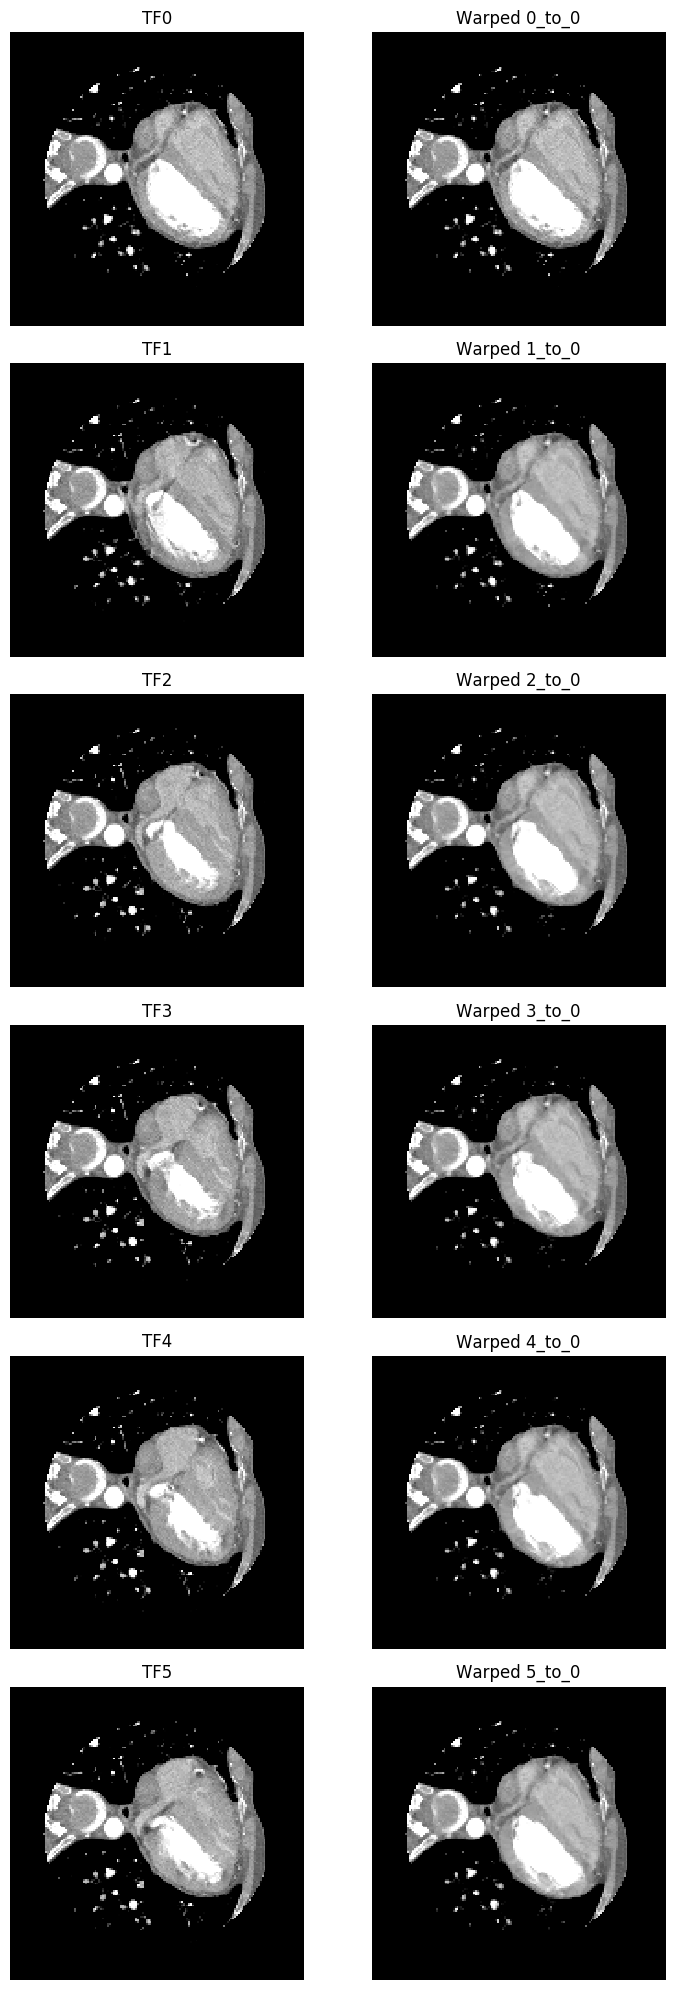

In [43]:
fig, axes = plt.subplots(6, 2, figsize=(8,20))  # 7 rows, 2 columns
slice_n = 10

# List of original and warped arrays
time_frames = [tf0, tf2, tf3, tf4, tf5, tf6]
warped_frames = [tf0,  warped_2, warped_3, warped_4, warped_5, warped_6]

# Plot each pair in the grid
for i in range(6):
    # Left column: Original time frame
    axes[i, 0].imshow(ff.set_window(time_frames[i][:, :, slice_n], 0, 1000), cmap='gray')
    axes[i, 0].set_title(f'TF{i}')
    axes[i, 0].axis('off')
    
    # Right column: Warped time frame
    axes[i, 1].imshow(ff.set_window(warped_frames[i][:, :, slice_n], 0, 1000), cmap='gray')
    axes[i, 1].set_title(f'Warped {i}_to_0')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [38]:
# moving_image = tf1
# deformation_field = mvf
# warped_image = apply_deformation_field_numpy(moving_image, deformation_field)

# # plot moving image, tf2, warped_image side by side , slice = 50
# import matplotlib.pyplot as plt
# slice_n = 44
# fig, ax = plt.subplots(1,4, figsize = (40,10))
# tf11 = ff.set_window(tf1[:,:,slice_n], 0, 1000)
# tf22 = ff.set_window(tf2[:,:,slice_n], 0, 1000)
# warped_image1 = ff.set_window(warped_image[:,:,slice_n], 0, 1000)
# ax[0].imshow(tf11, cmap = 'gray')
# ax[0].set_title('moving')
# ax[1].imshow(tf22, cmap = 'gray')
# ax[1].set_title('fixed')
# ax[2].imshow(warped_image1, cmap = 'gray')
# ax[2].set_title('warped')
# ax[3].imshow(tf22 - warped_image1, cmap = 'gray')
# ax[3].set_title('diff')



In [ ]:
max_index = np.unravel_index(np.argmax(mvf), mvf.shape)
print(max_index)

### warp time frame 0 to other time frames

In [14]:
patient_class = 'Normal'
patient_id = 'CVC1907261511' 

# load each time frame
tf0 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[0]).get_fdata()
tf0 = Data_processing.crop_or_pad(tf0, [160,160,96], value = np.min(tf0))
tf1 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[1]).get_fdata()
tf1 = Data_processing.crop_or_pad(tf1, [160,160,96], value = np.min(tf1)) 
tf2 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[2]).get_fdata()
tf2 = Data_processing.crop_or_pad(tf2, [160,160,96], value = np.min(tf2))
tf3 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[3]).get_fdata()
tf3 = Data_processing.crop_or_pad(tf3, [160,160,96], value = np.min(tf3))
tf4 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[4]).get_fdata()
tf4 = Data_processing.crop_or_pad(tf4, [160,160,96], value = np.min(tf4))
tf5 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[5]).get_fdata()
tf5 = Data_processing.crop_or_pad(tf5, [160,160,96], value = np.min(tf5))
tf6 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[6]).get_fdata()
tf6 = Data_processing.crop_or_pad(tf6, [160,160,96], value = np.min(tf6))
tf7 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[7]).get_fdata()
tf7 = Data_processing.crop_or_pad(tf7, [160,160,96], value = np.min(tf7))

# load mvf
model_name ='voxel_morph_warp0_epoch233'
study_name = 'mvf_warp0'
mvf1 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id, model_name,'1.nii.gz')).get_fdata()
mvf2 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'2.nii.gz')).get_fdata()
mvf3 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'3.nii.gz')).get_fdata()
mvf4 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'4.nii.gz')).get_fdata()
mvf5 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'5.nii.gz')).get_fdata()
mvf6 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'6.nii.gz')).get_fdata()
mvf7 = nb.load(os.path.join(main_path,study_name, patient_class, patient_id,model_name,'7.nii.gz')).get_fdata()

# apply mvf to tf0
moving_image = tf0
warped_1 = apply_deformation_field_numpy(moving_image, mvf1)
warped_2 = apply_deformation_field_numpy(moving_image, mvf2)
warped_3 = apply_deformation_field_numpy(moving_image, mvf3)
warped_4 = apply_deformation_field_numpy(moving_image, mvf4)
warped_5 = apply_deformation_field_numpy(moving_image, mvf5)
warped_6 = apply_deformation_field_numpy(moving_image, mvf6)
warped_7 = apply_deformation_field_numpy(moving_image, mvf7)



In [15]:
max_index = np.unravel_index(np.argmax(mvf2), mvf2.shape)
print(max_index)

(85, 72, 57, 2)


In [5]:
print(np.max(abs(mvf3[:,:,26,0])))

1.6373765468597412


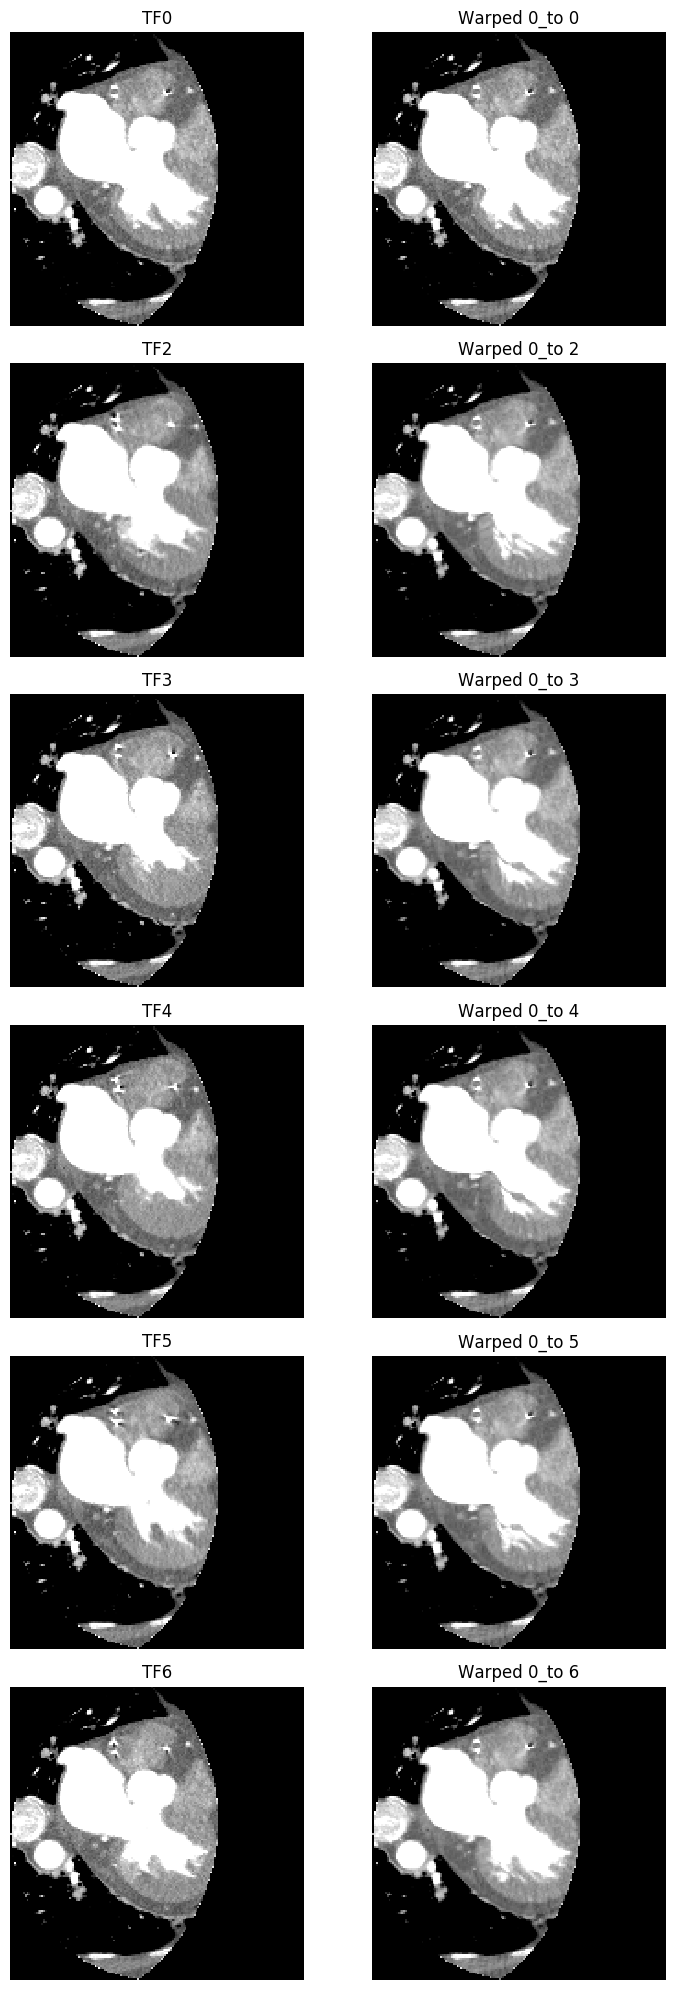

In [16]:
fig, axes = plt.subplots(6, 2, figsize=(8,20))  # 7 rows, 2 columns
slice_n = 50

# List of original and warped arrays
time_frames = [tf0, tf2, tf3, tf4, tf5, tf6]
warped_frames = [tf0,  warped_2, warped_3, warped_4, warped_5, warped_6]
tf_n = [0,2,3,4,5,6]

# Plot each pair in the grid
for i in range(6):
    # Left column: Original time frame
    axes[i, 0].imshow(ff.set_window(time_frames[i][:, :, slice_n], 0, 1000), cmap='gray')
    axes[i, 0].set_title(f'TF{tf_n[i]}')
    axes[i, 0].axis('off')
    
    # Right column: Warped time frame
    axes[i, 1].imshow(ff.set_window(warped_frames[i][:, :, slice_n], 0, 1000), cmap='gray')
    axes[i, 1].set_title(f'Warped 0_to {tf_n[i]}')
    axes[i, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


# will data augmentation impact

In [ ]:
mvf3_new = np.zeros(mvf3.shape)
for z in range(0,3):
    m = np.copy(mvf3)[...,z]
    m = Data_processing.rotate_image(m,[0,0,10],1)
    m = Data_processing.translate_image(m, [10,20,0])
    
    mvf3_new[...,z] = m
moving_image_new = np.copy(moving_image )
moving_image_new = Data_processing.rotate_image(moving_image_new,[0,0,10],1)
moving_image_new = Data_processing.translate_image(moving_image_new, [10,20,0])
warped_3_new = apply_deformation_field_numpy(moving_image_new, mvf3_new)

# plot warped3 and warped3_new side by side
fig, axes = plt.subplots(1, 2, figsize=(8,20))  # 7 rows, 2 columns
slice_n = 42
WL = 0
WW = 1500
axes[0].imshow(ff.set_window(warped_3[:, :, slice_n], WL, WW), cmap='gray')
axes[0].set_title(f'Warped 3')
axes[0].axis('off')
axes[1].imshow(ff.set_window(warped_3_new[:, :, slice_n], WL, WW), cmap='gray')
axes[1].set_title(f'Warped 3_new')

### apply predicted mvf

In [86]:
patient_class = 'Normal'
patient_id = 'CVC1902251312' # CVC1902221320 不同tf之间没有一一对应的slice
tf0 = nb.load(ff.sort_timeframe(ff.find_all_target_files(['*.nii.gz'],os.path.join(main_path,'nii-images',patient_class,patient_id,'img-nii-resampled-1.5mm')),2)[0]).get_fdata()
tf0 = Data_processing.crop_or_pad(tf0, [160,160,96], value = np.min(tf0))[:,:,10:75]
print(tf0.shape)

# mvf = nb.load(os.path.join(main_path,'mvf_new', patient_class, patient_id,'voxel_morph_val4_new_epoch119',str(tf_num)+'.nii.gz')).get_fdata()
mvf = nb.load(os.path.join(main_path, 'models/MVF_downsampled_imgcon_trial1/pred_mvf', patient_class, patient_id,'epoch196','pred-epoch-196.nii.gz')).get_fdata()
print(np.max(abs(mvf)), mvf.shape)

(160, 160, 65)
4.874773025512695 (12, 80, 80, 65)


In [87]:
max_index = np.unravel_index(np.argmax(abs(mvf)), mvf.shape)
print(max_index)

(7, 10, 35, 54)


In [88]:
mvf_0 = mvf[0:3,:,:,:]; mvf_0 = np.transpose(mvf_0, (1,2,3,0)); mvf_0_up = zoom(mvf_0, (2,2,1,1), order = 1)
mvf_1 = mvf[3:6,:,:,:]; mvf_1 = np.transpose(mvf_1, (1,2,3,0)); mvf_1_up = zoom(mvf_1, (2,2,1,1), order = 1)
mvf_2 = mvf[6:9,:,:,:]; mvf_2 = np.transpose(mvf_2, (1,2,3,0)); mvf_2_up = zoom(mvf_2, (2,2,1,1), order = 1)
mvf_3 = mvf[9:12,:,:,:]; mvf_3 = np.transpose(mvf_3, (1,2,3,0)); mvf_3_up = zoom(mvf_3, (2,2,1,1), order = 1)

# mvf_4 = nb.load(os.path.join(main_path,'mvf_new', patient_class, patient_id,'voxel_morph_val4_new_epoch119','6.nii.gz')).get_fdata()[:,:,10:75]
# print(mvf_4.shape, np.max(mvf_4), np.min(mvf_4))

In [94]:
print(np.max(abs(mvf_2_up[:,:,54,1])))

4.797464463224253


Text(0.5, 1.0, 'warped_image_0_to0.75RR')

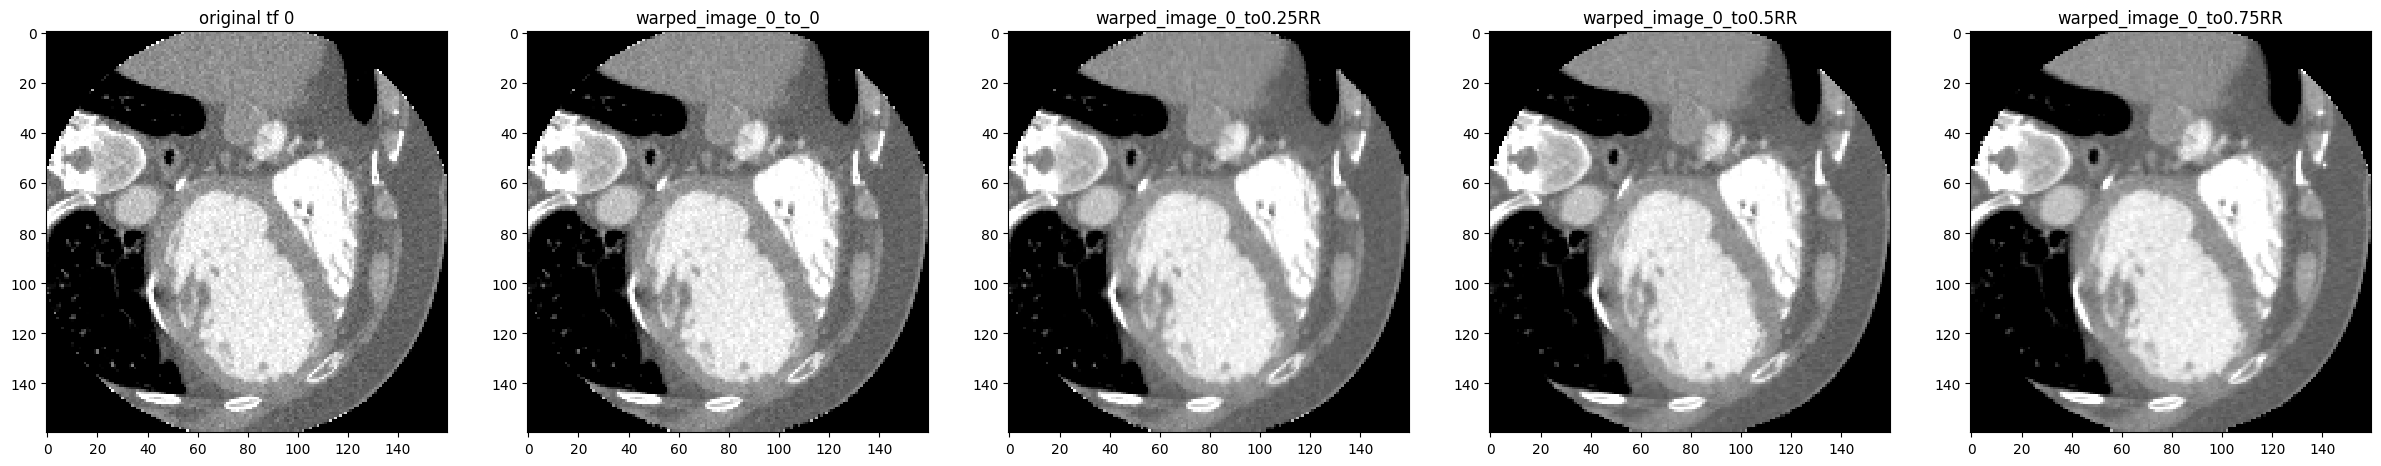

In [91]:
moving_image = tf0
warped_image_0 = apply_deformation_field_numpy(moving_image, -mvf_0_up)
warped_image_1 = apply_deformation_field_numpy(moving_image, -mvf_1_up)
warped_image_2 = apply_deformation_field_numpy(moving_image, -mvf_2_up)
warped_image_3 = apply_deformation_field_numpy(moving_image, -mvf_3_up)


# plot tf0 and warped_image_0, warped_image_1, warped_image_2, warped_image_3 side by side , slice = 25
import matplotlib.pyplot as plt
slice_n = 15
fig, ax = plt.subplots(1,5, figsize = (30,10))
tf00 = ff.set_window(tf0[:,:,slice_n], 0, 1000)
warped_image_00 = ff.set_window(warped_image_0[:,:,slice_n], 0, 1000)
warped_image_11 = ff.set_window(warped_image_1[:,:,slice_n], 0, 1000)
warped_image_22 = ff.set_window(warped_image_2[:,:,slice_n], 0, 1000)
warped_image_33 = ff.set_window(warped_image_3[:,:,slice_n], 0, 1000)

# warped_image_44 = ff.set_window(warped_image_4[:,:,slice_n], 0, 1000)

ax[0].imshow(tf00, cmap = 'gray')
ax[0].set_title('original tf 0')
ax[1].imshow(warped_image_00, cmap = 'gray')
ax[1].set_title('warped_image_0_to_0')
ax[2].imshow(warped_image_11, cmap = 'gray')
ax[2].set_title('warped_image_0_to0.25RR')
ax[3].imshow(warped_image_22, cmap = 'gray')
ax[3].set_title('warped_image_0_to0.5RR')
ax[4].imshow(warped_image_33, cmap = 'gray')
ax[4].set_title('warped_image_0_to0.75RR')


### check the max and min of mvf

In [20]:
p = ff.find_all_target_files(['Normal/*','Abnormal/*'],os.path.join(main_path,'mvf_new'))

In [21]:
for i in range(0,len(p)):
    path = os.path.join(p[i],'voxel_morph_val4_new_epoch119' )
    files = ff.find_all_target_files(['*.nii.gz'],path)
    zz = np.zeros([160,160,96,3,len(files)])

    for j in range(0,len(files)):
        zz[:,:,:,:,j] = nb.load(files[j]).get_fdata()

    print(os.path.basenmae(p[i]),np.max(zz), np.min(zz))